# Exercise 2: Layered materials and van der Waals interactions (40 points)

- **Layered materials**: strong chemical bonds between atoms belonging to the same layer. Neighboring layers held together by the weak van der Waals interactions. 

- Van der Waals dispersion interaction (force) has a long-range decay $\propto r^{-6}$: **non local effect**. We therefore need to **include non-local correlations**. 

- Non-local correlations are modeled with an additional term in the exchange-correlation DFT functional.  

## Molybdenum disulfide

We will optimize the lattice parameters of $\text{MoS}_2$ with dW-DF2-c09 functional. 

- In each plane atoms are arranged in *hexagonal Bravais lattice*. 
- Two parameters are used to fully define the unit cell: 
    - $a$: usual lattice constant governing the atomic dsplacement in the planes
    - $c$: interlayer separation

Choice of primitive vectors: 
$$
\vec a_1 = a(1,0,0),\quad \vec a_2 = \frac{a}{2} (-1,\sqrt 3, 0),\quad \vec a_3 = a (0,0,c/a) 
$$

## Geometry optimization of $\text{MoS}_2$

**Task**: *First optimize $a$ by keeping c fixed (e.g., equal to the experimental value $c_{exp} = 12.30  \AA$; note that the unit cell includes two layers) by running several calculations for different values of $a$ and finding when the energy is minimal. You might want to consider a range of values around the experimental one ($a_{exp} = 3.16  \AA$). Do the optimization with and without accounting for the van der Waals interactions. Compare the features of the resulting curves in the two cases. Fit the curves to find the optimized in-plane lattice parameter, and compare both cases.*

In the input file, we must first convert $a_{exp}$ and $c_{exp}$ in Bohr. 

In [1]:
import numpy as np
import lmfit
import matplotlib.pyplot as plt
from IPython.display import HTML, display, clear_output

In [2]:
BOHR = 0.529177210544  # Bohr radius in Angstroms
RY = 13.605693122990   # Rydberg energy in eV

a_exp = 3.16  # Ang
c_exp = 12.30 # Ang

a_exp_input = a_exp / BOHR
c_exp_input = c_exp / BOHR

print(f"a_exp_input = ", a_exp_input, " Bohr")
print(f"c_exp_input = ", c_exp_input, " Bohr")
print("-" * 20)

# print with 2 decimal places
print(f"ALIST = {np.linspace(a_exp_input - 0.1, a_exp_input + 0.1, 21)}")
print("-" * 20)
print(f"CLIST = {np.linspace(c_exp_input - 0.1, c_exp_input + 0.1, 21)}")

a_exp_input =  5.971534557868592  Bohr
c_exp_input =  23.243631348665723  Bohr
--------------------
ALIST = [5.87153456 5.88153456 5.89153456 5.90153456 5.91153456 5.92153456
 5.93153456 5.94153456 5.95153456 5.96153456 5.97153456 5.98153456
 5.99153456 6.00153456 6.01153456 6.02153456 6.03153456 6.04153456
 6.05153456 6.06153456 6.07153456]
--------------------
CLIST = [23.14363135 23.15363135 23.16363135 23.17363135 23.18363135 23.19363135
 23.20363135 23.21363135 23.22363135 23.23363135 23.24363135 23.25363135
 23.26363135 23.27363135 23.28363135 23.29363135 23.30363135 23.31363135
 23.32363135 23.33363135 23.34363135]


Expanding the total energy around the equilibrium lattice constant, we get
$$
E(a) = E(a_0) + (a-a_0)^2 \partial^2_aE = 
$$
Which is equivalent to 
$$
\Delta E = \alpha (a-a_0)^2. 
$$
The equilibrium lattice constant can thus be determined using a fit. 

In [118]:
def parabola(x, amplitude, center, offset):
    """Defines a parabola: f(x) = amplitude * (x - center)**2 + offset"""
    return amplitude * (x - center)**2 + offset

def fit_parabola(lattice_parameter, energy): 
    parabolic_model = lmfit.Model(parabola)

    min_idx = np.argmin(energy)
    initial_center = lattice_parameter[min_idx]
    initial_offset = energy[min_idx]
    initial_amplitude = (energy[min_idx] - initial_offset) / ((lattice_parameter[0] - initial_center)**2 + 1e-9)
    params = parabolic_model.make_params(amplitude=initial_amplitude if initial_amplitude > 0 else 1,
                                        center=initial_center,
                                        offset=initial_offset)
    result = parabolic_model.fit(energy, params, x=lattice_parameter)
    print(result.fit_report())

    a_fit = result.params['center'].value
    err_a = np.sqrt(result.covar[1, 1])
    E0_fit = result.params['offset'].value
    err_E0 = np.sqrt(result.covar[2, 2])
    amplitude_fit = result.params['amplitude'].value
    err_amplitude = np.sqrt(result.covar[0, 0])

    x_fit = np.linspace(lattice_parameter.min(), lattice_parameter.max(), 1000)
    y_fit = result.eval(x=x_fit)

    display(HTML("<h3>Results</h3>"))
    display(HTML(f"<b>Optimized lattice parameter: ({a_fit:.4f} ± {err_a:.4f}) Å</b>"))
    display(HTML(f"<b>Optimized lattice parameter: ({a_fit / BOHR:.4f} ± {err_a / BOHR:.4f}) Bohr</b>"))
    display(HTML(f"<b>Minimum energy (E_0): ({E0_fit:.4f} ± {err_E0:.4f}) eV</b>"))
    display(HTML(f"<b>Fitted amplitude (A): ({amplitude_fit:.4f} ± {err_amplitude:.4f}) eV/Å²</b>"))

    return x_fit, y_fit

[[Model]]
    Model(parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 22
    # variables        = 3
    chi-square         = 1.1421e-10
    reduced chi-square = 6.0109e-12
    Akaike info crit   = -565.649266
    Bayesian info crit = -562.376138
    R-squared          = 0.99950521
[[Variables]]
    amplitude:  0.09966852 +/- 5.2011e-04 (0.52%) (init = 1)
    center:     3.19757804 +/- 7.9851e-05 (0.00%) (init = 3.197042)
    offset:    -28.4479947 +/- 7.8304e-07 (0.00%) (init = -28.448)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, offset) = -0.7419
    C(amplitude, center) = -0.2079


[[Model]]
    Model(parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 21
    # variables        = 3
    chi-square         = 6.9571e-11
    reduced chi-square = 3.8650e-12
    Akaike info crit   = -549.097213
    Bayesian info crit = -545.963646
    R-squared          = 0.99964207
[[Variables]]
    amplitude:  0.10256790 +/- 4.6874e-04 (0.46%) (init = 1)
    center:     3.15680887 +/- 6.6876e-05 (0.00%) (init = 3.154708)
    offset:    -28.4353551 +/- 6.4263e-07 (0.00%) (init = -28.43536)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, offset) = -0.7416
    C(amplitude, center) = +0.2181


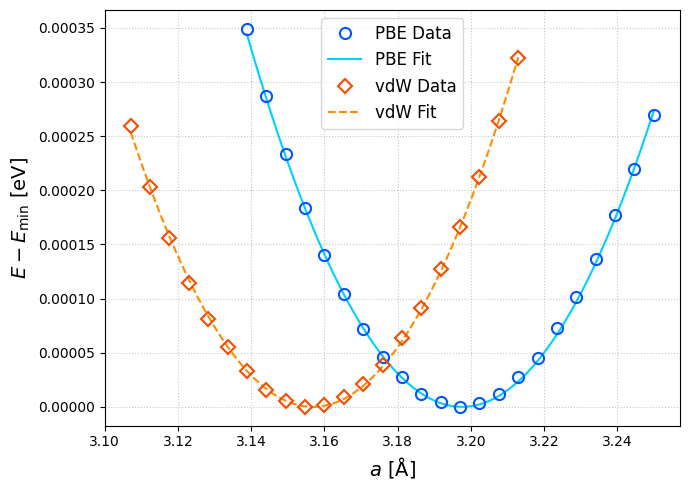

In [119]:
# --- Optimization of a keeping c fixed (at c_exp) with and without van der Waals interactions ---
pbe_data = np.loadtxt("geometry_optimization\pbe\MoS2_eos_pbe_ac_optA.dat", skiprows=1)
pbe_a_values = pbe_data[16:-3, 0] * BOHR  
pbe_energy_values = pbe_data[16:-3, 2] / RY  

vdw_data = np.loadtxt("geometry_optimization/vdw/MoS2_eos_vdw_ac_optA.dat", skiprows=1)
vdw_a_values = vdw_data[:, 0] * BOHR
vdw_energy_values = vdw_data[:, 2] / RY
  
x_pbe, y_pbe = fit_parabola(pbe_a_values, pbe_energy_values)
x_vdw, y_vdw = fit_parabola(vdw_a_values, vdw_energy_values)

# --- Plotting the results ---
diff_e_pbe = pbe_energy_values - min(pbe_energy_values)
diff_e_vdw = vdw_energy_values - min(vdw_energy_values)
diff_fit_pbe = y_pbe - min(y_pbe)
diff_fit_vdw = y_vdw - min(y_vdw)

plt.figure(figsize=(7, 5))
plt.plot(pbe_a_values, diff_e_pbe, 
         marker='o', color='#0055FF', markersize=8, markerfacecolor='None', markeredgewidth=1.5,
         linestyle='None', label='PBE Data', zorder=3)

plt.plot(x_pbe, diff_fit_pbe, 
         color='#00CFFF', linestyle='-', linewidth=1.5, label='PBE Fit', zorder=2)


plt.plot(vdw_a_values, diff_e_vdw, 
         marker='D', color='#F54C00', markersize=7, markerfacecolor='None', markeredgewidth=1.5,
         linestyle='None', label='vdW Data', zorder=3)

plt.plot(x_vdw, diff_fit_vdw, 
         color='#FF8C00', linestyle='--', linewidth=1.5, label='vdW Fit', zorder=2)

plt.xlabel(r'$a$ [$\mathrm{\AA}$]', fontsize=14)
plt.ylabel(r'$E - E_{\mathrm{min}}$ [eV]', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()


**Task**: *You can now use the optimized in-plane lattice parameter from the previous question. Study the ground-state energy as a function of the separation between the layers, with and without accounting for van der Waals interactions. Compare the features of the resulting curves in the two cases. Can you find a clear minimum in both cases? Can you see the effects of the van der Waals interactions? Fit the curves appropriately to find the optimized interlayer separation when possible. How do these values compare with each other and with experimental results?*


[[Model]]
    Model(parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 58
    # variables        = 3
    chi-square         = 1.2942e-10
    reduced chi-square = 2.3531e-12
    Akaike info crit   = -1550.04821
    Bayesian info crit = -1543.86689
    R-squared          = 0.99981514
[[Variables]]
    amplitude:  4.7707e-04 +/- 7.1107e-06 (1.49%) (init = 1)
    center:     13.1613706 +/- 0.01015042 (0.08%) (init = 12.82918)
    offset:    -28.4483474 +/- 3.1281e-06 (0.00%) (init = -28.4483)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, center) = -0.9924
    C(center, offset)    = -0.9828
    C(amplitude, offset) = +0.9541


[[Model]]
    Model(parabola)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 62
    # variables        = 3
    chi-square         = 5.6489e-11
    reduced chi-square = 9.5744e-13
    Akaike info crit   = -1712.89474
    Bayesian info crit = -1706.51333
    R-squared          = 0.97664414
[[Variables]]
    amplitude:  7.7401e-04 +/- 1.6068e-05 (2.08%) (init = 1)
    center:     12.2578654 +/- 8.9335e-04 (0.01%) (init = 12.24708)
    offset:    -28.4353572 +/- 1.8502e-07 (0.00%) (init = -28.43536)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, offset) = -0.7360
    C(amplitude, center) = -0.2439


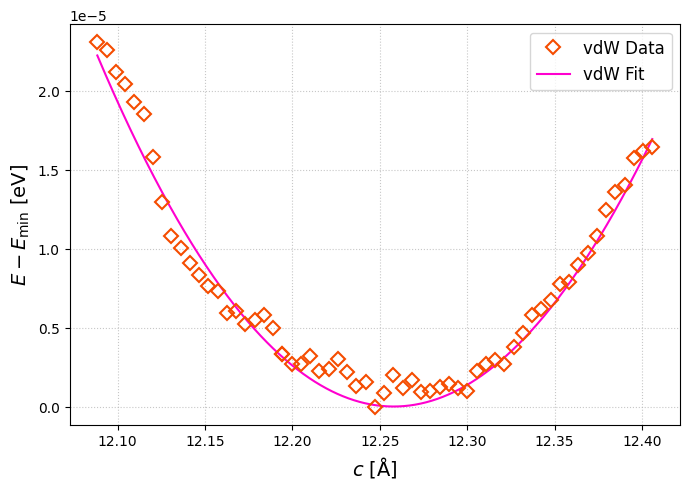

In [164]:
# --- Optimization of c keeping a fixed with and without van der Waals interactions ---
pbe_data = np.loadtxt("geometry_optimization\pbe\MoS2_eos_pbe_ac_optC.dat", skiprows=1)
pbe_c_values = pbe_data[:, 1] * BOHR  
pbe_energy_values = pbe_data[:, 2] / RY  

vdw_data = np.loadtxt("geometry_optimization/vdw/MoS2_eos_vdw_ac_optC.dat", skiprows=1)
vdw_c_values = vdw_data[:, 1] * BOHR
vdw_energy_values = vdw_data[:, 2] / RY
  
x_pbe, y_pbe = fit_parabola(pbe_c_values, pbe_energy_values)
x_vdw, y_vdw = fit_parabola(vdw_c_values, vdw_energy_values)

# --- Plotting the results ---
diff_e_pbe = pbe_energy_values - min(pbe_energy_values)
diff_e_vdw = vdw_energy_values - min(vdw_energy_values)
diff_fit_pbe = y_pbe - min(y_pbe)
diff_fit_vdw = y_vdw - min(y_vdw)

plt.figure(figsize=(7, 5))
# plt.plot(pbe_c_values, diff_e_pbe, 
#          marker='o', color='#0055FF', markersize=8, markerfacecolor='None', markeredgewidth=1.5,
#          linestyle='None', label='PBE Data', zorder=3)
# 
# plt.plot(x_pbe, diff_fit_pbe,
#          color='#00CFFF', linestyle='-', linewidth=1.5, label='PBE Fit', zorder=2)
# 
plt.plot(vdw_c_values, diff_e_vdw,
         marker='D', color='#F54C00', markersize=7, markerfacecolor='None', markeredgewidth=1.5,
         linestyle='None', label='vdW Data', zorder=3)

plt.plot(x_vdw, diff_fit_vdw,
         color='#FF00CFFF', linestyle='-', linewidth=1.5, label='vdW Fit', zorder=2)

plt.xlabel(r'$c$ [$\mathrm{\AA}$]', fontsize=14)
plt.ylabel(r'$E - E_{\mathrm{min}}$ [eV]', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.show()

## Band Structure of $\text{MoS}_2$

**Task**: *By using the lattice constants previously obtained (with van der Waals), compute the band structure of MoS2. Where is (in momentum space) the top of the valence band? Where is the bottom of the conduction band? How many inequivalent global minima are present in the lowest conduction band? Is the band gap direct or indirect? How large is it?*

As in the first exercise, we fix the $k$ points density per unit length and compute the distance between consecutive points. 
- K to Γ: 
- Γ to M: 
- M to K: 

We use $a=5.9655$ Bohr and $c=23.1640$ Bohr, meaning celldm(3)=$c/a=3.8830$. 

In [165]:
print(f"c/a = {23.1640 / 5.9655:.4f}")

c/a = 3.8830


In [172]:
Gamma = np.array([0, 0, 0])
K = np.array([1/3, 1/3, 0])
M = np.array([0.5, 0, 0])

K_to_Gamma = np.linalg.norm(K - Gamma)
Gamma_to_M = np.linalg.norm(Gamma - M)
M_to_K = np.linalg.norm(K - M)

n_points = 100
print(f"Distance from K to Gamma: {K_to_Gamma:.4f}, Number of points: {int(n_points * K_to_Gamma)}")
print(f"Distance from Gamma to M: {Gamma_to_M:.4f}, Number of points: {int(n_points * Gamma_to_M)}")
print(f"Distance from K to M: {M_to_K:.4f}, Number of points: {int(n_points * M_to_K)}")
print(f"Total distance: {K_to_Gamma + Gamma_to_M + M_to_K:.4f}")

Distance from K to Gamma: 0.4714, Number of points: 47
Distance from Gamma to M: 0.5000, Number of points: 50
Distance from K to M: 0.3727, Number of points: 37
Total distance: 1.3441


In [179]:
data = np.loadtxt('bands/MoS2.dat.gnu')

## Single Layer of $\text{MoS}_2$

**Task**: *We now want to study a single layer of MoS2. In order to simulate the electronic properties of a two-dimensional single layer of MoS2, it is sufficient to account for a sufficiently large distance between layers. Determine an appropriate inter-layer distance to simulate a single layer of Mo2. Compute the band structure of monolayer MoS2. How does it change in comparison with the band structure of bulk MoS2?*